In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load the dataset
df = pd.read_csv(r'C:\Users\pc\OneDrive - Higher Education Commission\Documents\Git Hub Projects\AirPassengers.csv')
print(df.dtypes)

In [77]:
df.set_index('month', inplace=True)

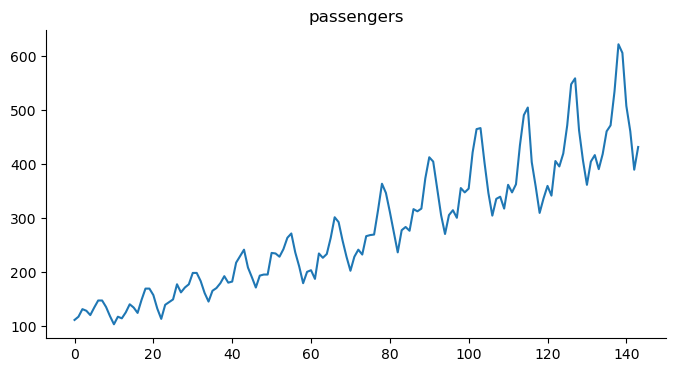

In [72]:
# @title Passengers

from matplotlib import pyplot as plt
plt.style.use('default')
df['passengers'].plot(kind='line', figsize=(8, 4), title='passengers')
plt.gca().spines[['top', 'right']].set_visible(False)


In [11]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['passengers'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.815369
p-value: 0.991880


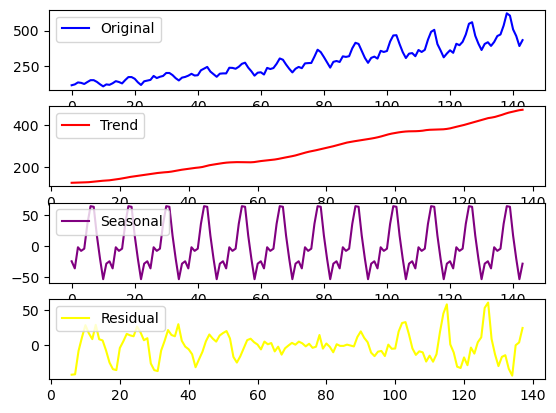

In [39]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['passengers'], model='additive', period=12)

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.subplot(411)
plt.plot(df['passengers'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='purple')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')


plt.show()

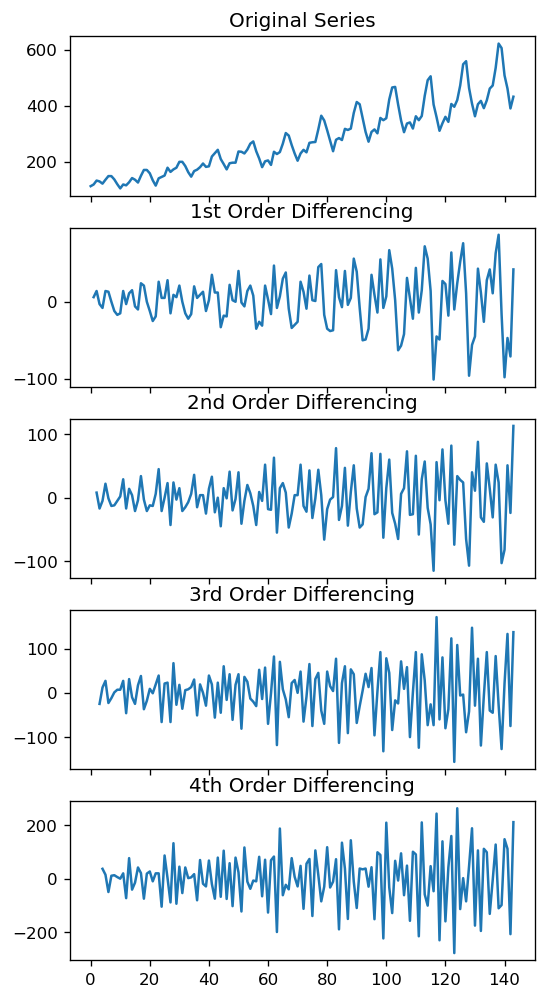

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(5,10), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(5, 1, sharex=True)
axes[0].plot(df.passengers); axes[0].set_title('Original Series')
#plot_acf(df.passengers, ax=axes[0, 1])

# 1st Differencing
axes[1].plot(df.passengers.diff()); axes[1].set_title('1st Order Differencing')
#plot_acf(df.passengers.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2].plot(df.passengers.diff().diff()); axes[2].set_title('2nd Order Differencing')
#plot_acf(df.passengers.diff().diff().dropna(), ax=axes[2, 1])
# 3rd Differencing
axes[3].plot(df.passengers.diff().diff().diff()); axes[3].set_title('3rd Order Differencing')
# 4th Differencing
axes[4].plot(df.passengers.diff().diff().diff().diff()); axes[4].set_title('4th Order Differencing')
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


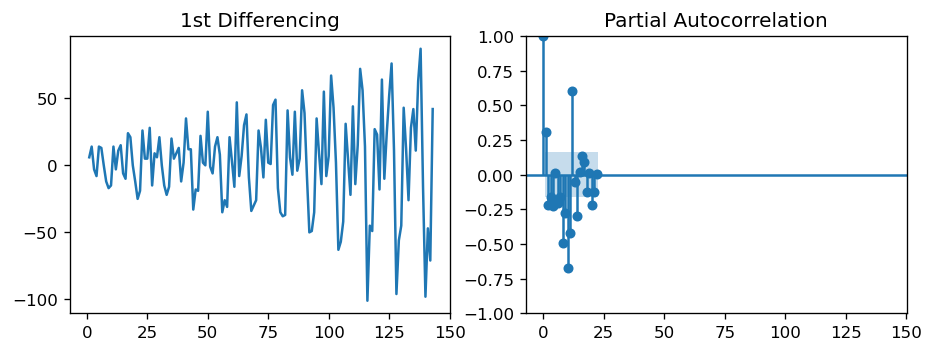

In [41]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.passengers.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.passengers.diff().dropna(), ax=axes[1])

plt.show()

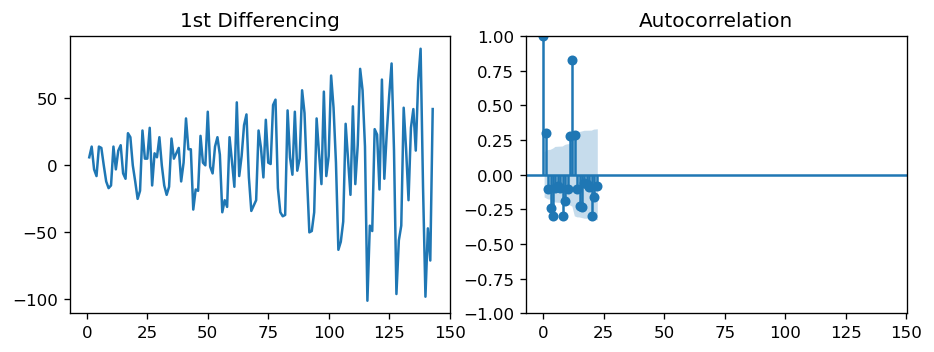

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.passengers.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1))
plot_acf(df.passengers.diff().dropna(), ax=axes[1])

plt.show()

In [79]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.passengers, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -688.749
Date:                Tue, 16 Jul 2024   AIC                           1385.498
Time:                        18:35:26   BIC                           1397.349
Sample:                    01-01-1949   HQIC                          1390.313
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5724      0.097      5.928      0.000       0.383       0.762
ma.L1         -0.3126      0.098     -3.198      0.001      -0.504      -0.121
ma.L2         -0.5078      0.069     -7.412      0.0

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


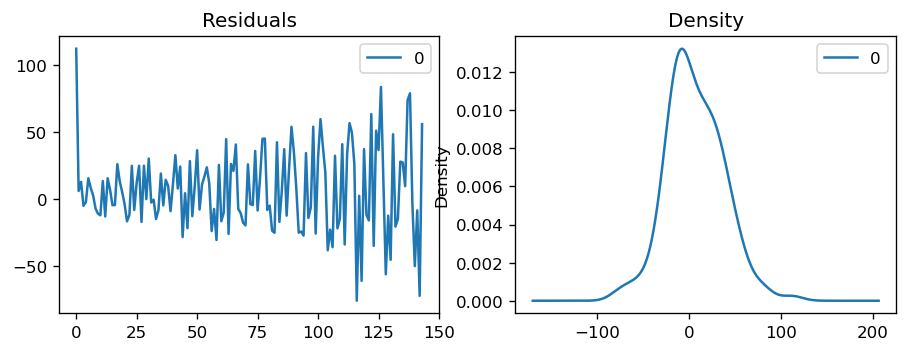

In [43]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [58]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.passengers[:85]
test = df.passengers[85:]


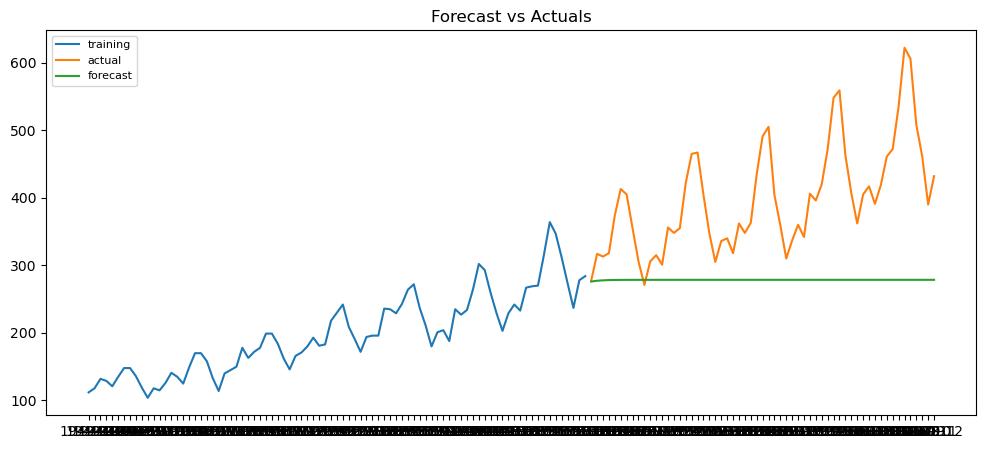

In [80]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit()  
# Forecast
fc = fitted.forecast(119)  # Only forecasted values

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                   85
Model:                 ARIMA(3, 4, 1)   Log Likelihood                -398.032
Date:                Tue, 16 Jul 2024   AIC                            806.065
Time:                        19:06:04   BIC                            818.037
Sample:                    01-01-1949   HQIC                           810.868
                         - 01-01-1956                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8766      0.145     -6.037      0.000      -1.161      -0.592
ar.L2         -0.6331      0.145     -4.358      0.000      -0.918      -0.348
ar.L3         -0.1994      0.124     -1.611      0.1

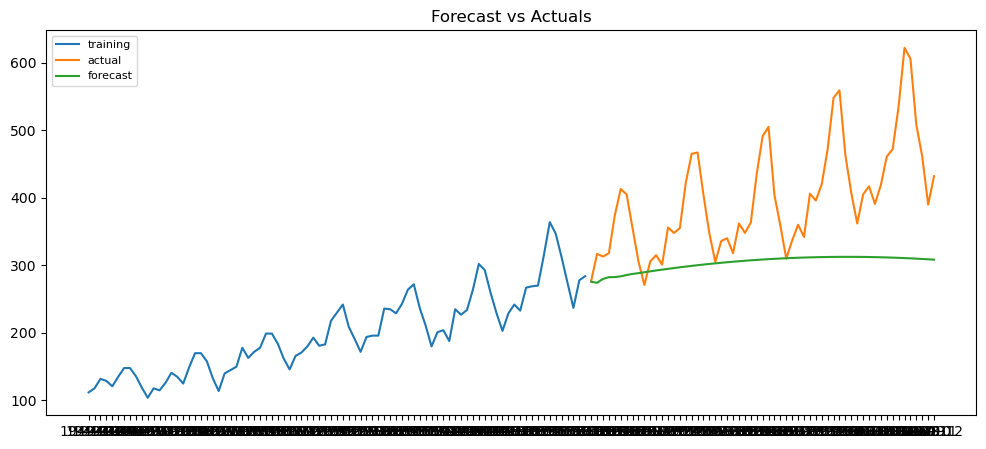

In [88]:
# Build Model
model = ARIMA(train, order=(3, 4, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc = fitted.forecast(119)  # Only forecasted values




# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [92]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(test, fc_series)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 120.93507749413534


In [97]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming fc_series and test are defined

# Calculate MAPE
mape = mean_absolute_percentage_error(test, fc_series)

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 21.64%


In [98]:
!pip install pmdarima

     ------------------------------------ 613.3/613.3 kB 559.4 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 909.1 kB/s eta 0:00:00


In [100]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.passengers, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1411.319, Time=0.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, T